# **Case Study Description**
The Google Data Analytics Professional Certificate Capstone project is a case study. The program offered two tracks that offered either a case study provided by the program or the option to create our own. I chose to create my own since this was my first project and I wanted the practice.

I chose this dataset to use in answering the question: What is the relationship between social media use and user psychological well-being?

# **Data Description**

Data includes:
* age
* gender
* relationship status
* occupation
* organization affiliation
* social media use user?
* social media platforms used
* time spent on social media
* results for ADHD, anxiety, self-esteem, and depression screenings.



Mental Health uses Likert Scale:
* Purposeless use of Social Media Question 9 = ADHD Q1
* Distracted by Social Media Question 10 = ADHD Q2
* Restlessness if Social Media not used Question 11 = Anxiety Q1
* Ease of Distraction by Social Media Question 12 = ADHD Q3
* Bothered by worries Question 13 = Anxiety Q2
* Difficulty in concentrating Question 14 = ADHD Q4
* Comparison of self to peers Question 15 = Self Esteem Q1
* Feelings about above comparison Question 16 = Self Esteem, Q2
* Validation sought from Social Media Question 17 = Self Esteem Q3
* Feelings of Depression Question 18 = Depression Q1
* Fluctuation of interest Question 19 = Depression Q2
* Sleep Issues Question 20 = Depression Q3


In [306]:
#importing necessary packages for project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [307]:
#load data set
data=pd.read_csv('smmh.csv')

In [308]:
# Setting to display all columns
pd.set_option("display.max_columns", None)

In [309]:
# Printing first 5 entries in the data set
data.head()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
0,4/18/2022 19:18:47,21.0,Male,In a relationship,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,2,5,2,5,2,3,2,5,4,5
1,4/18/2022 19:19:28,21.0,Female,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,2,4,5,4,5,1,1,5,4,5
2,4/18/2022 19:25:59,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,1,2,5,4,3,3,1,4,2,5
3,4/18/2022 19:29:43,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram",More than 5 hours,4,2,1,3,5,3,5,1,2,4,3,2
4,4/18/2022 19:33:31,21.0,Female,Single,University Student,University,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,4,5,5,3,3,3,4,4,1


In [310]:
# Printing last 5 entries in the data set
data.tail()

,Timestamp,1. What is your age?,2. Gender,3. Relationship Status,4. Occupation Status,5. What type of organizations are you affiliated with?,6. Do you use social media?,7. What social media platforms do you commonly use?,8. What is the average time you spend on social media every day?,9. How often do you find yourself using Social media without a specific purpose?,10. How often do you get distracted by Social media when you are busy doing something?,11. Do you feel restless if you haven't used Social media in a while?,"12. On a scale of 1 to 5, how easily distracted are you?","13. On a scale of 1 to 5, how much are you bothered by worries?",14. Do you find it difficult to concentrate on things?,"15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?","16. Following the previous question, how do you feel about these comparisons, generally speaking?",17. How often do you look to seek validation from features of social media?,18. How often do you feel depressed or down?,"19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?","20. On a scale of 1 to 5, how often do you face issues regarding sleep?"
476,5/21/2022 23:38:28,24.0,Male,Single,Salaried Worker,"University, Private",Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,4,3,4,3,4,4,2,4,3,4,4
477,5/22/2022 0:01:05,26.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 1 and 2 hours,2,1,2,3,4,4,4,2,4,4,4,1
478,5/22/2022 10:29:21,29.0,Female,Married,Salaried Worker,University,Yes,"Facebook, YouTube",Between 2 and 3 hours,3,3,4,3,2,3,3,3,4,2,2,2
479,7/14/2022 19:33:47,21.0,Male,Single,University Student,University,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,2,3,2,3,3,2,2,3,4,4,5,4
480,11/12/2022 13:16:50,53.0,Male,Married,Salaried Worker,Private,Yes,"Facebook, YouTube",Less than an Hour,2,3,1,3,1,1,3,3,2,2,2,3


In [311]:
#determining data shape (number of rows,columns)
data.shape

(481, 21)

# **Data Pre-Proceesing and Cleaning**

Rename the Columns:
The column names are very long so shortening the names will make handling the data easier.


In [312]:
#rename columns for necessary information
data.rename(columns = {'1. What is your age?':'Age','2. Gender':'Gender','3. Relationship Status':'Relationship Status',
                       '4. Occupation Status':'Occupation',
                       '5. What type of organizations are you affiliated with?':'Affiliations',
                       '6. Do you use social media?':'Social Media User?',
                       '7. What social media platforms do you commonly use?':'Platforms Used',
                       '8. What is the average time you spend on social media every day?':'Hours Per Day',
                       '9. How often do you find yourself using Social media without a specific purpose?':'ADHD Q1',
                       '10. How often do you get distracted by Social media when you are busy doing something?':'ADHD Q2',
                       "11. Do you feel restless if you haven't used Social media in a while?":'Anxiety Q1',
                       '12. On a scale of 1 to 5, how easily distracted are you?':'ADHD Q3',
                       '13. On a scale of 1 to 5, how much are you bothered by worries?':'Anxiety Q2',
                       '14. Do you find it difficult to concentrate on things?':'ADHD Q4',
                       '15. On a scale of 1-5, how often do you compare yourself to other successful people through the use of social media?':'Self Esteem Q1',
                       '16. Following the previous question, how do you feel about these comparisons, generally speaking?':'Self Esteem Q2',
                       '17. How often do you look to seek validation from features of social media?':'Self Esteem Q3',
                       '18. How often do you feel depressed or down?':'Depression Q1',
                       '19. On a scale of 1 to 5, how frequently does your interest in daily activities fluctuate?':'Depression Q2',
                       '20. On a scale of 1 to 5, how often do you face issues regarding sleep?':'Depression Q3' },inplace=True)

In [313]:
#review new column names
titles = list(data.columns)
titles

['Timestamp',
 'Age',
 'Gender',
 'Relationship Status',
 'Occupation',
 'Affiliations',
 'Social Media User?',
 'Platforms Used',
 'Hours Per Day',
 'ADHD Q1',
 'ADHD Q2',
 'Anxiety Q1',
 'ADHD Q3',
 'Anxiety Q2',
 'ADHD Q4',
 'Self Esteem Q1',
 'Self Esteem Q2',
 'Self Esteem Q3',
 'Depression Q1',
 'Depression Q2',
 'Depression Q3']

# Re-arranging the columns

so that ADHD and Anxiety questions are sequential and better organized

In [314]:
# rearranging ADHD and anxiety question columns so that they are sequential

titles[11], titles[12] = titles[12], titles[11]
titles[12], titles[14] = titles[14], titles[12]
titles[13], titles[14] = titles[14], titles[13]
data = data[titles]
titles

['Timestamp',
 'Age',
 'Gender',
 'Relationship Status',
 'Occupation',
 'Affiliations',
 'Social Media User?',
 'Platforms Used',
 'Hours Per Day',
 'ADHD Q1',
 'ADHD Q2',
 'ADHD Q3',
 'ADHD Q4',
 'Anxiety Q1',
 'Anxiety Q2',
 'Self Esteem Q1',
 'Self Esteem Q2',
 'Self Esteem Q3',
 'Depression Q1',
 'Depression Q2',
 'Depression Q3']

# **Dropping Columns**

I will not need timestamp or organization affiliation as it is not relevant to my project


In [315]:
#drop columns that are not relevant to this project
to_drop = ['Timestamp',
          'Affiliations']

data.drop(to_drop, inplace=True, axis=1)

In [316]:
#review columns for accuracy
titles = list(data.columns)
titles

['Age',
 'Gender',
 'Relationship Status',
 'Occupation',
 'Social Media User?',
 'Platforms Used',
 'Hours Per Day',
 'ADHD Q1',
 'ADHD Q2',
 'ADHD Q3',
 'ADHD Q4',
 'Anxiety Q1',
 'Anxiety Q2',
 'Self Esteem Q1',
 'Self Esteem Q2',
 'Self Esteem Q3',
 'Depression Q1',
 'Depression Q2',
 'Depression Q3']

In [317]:
#determining data shape after dropping two columns (number of rows,columns)
data.shape

(481, 19)

# **Handle Missing Values**

The following values are considered missing:
* Blank Values
* NaN
* null

In [318]:
missing_values = data.isna().sum()
print(missing_values)

Age                    0
Gender                 0
Relationship Status    0
Occupation             0
Social Media User?     0
Platforms Used         0
Hours Per Day          0
ADHD Q1                0
ADHD Q2                0
ADHD Q3                0
ADHD Q4                0
Anxiety Q1             0
Anxiety Q2             0
Self Esteem Q1         0
Self Esteem Q2         0
Self Esteem Q3         0
Depression Q1          0
Depression Q2          0
Depression Q3          0
dtype: int64


In [319]:
#check for null values
#Check number of records in each column of the data set.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  481 non-null    float64
 1   Gender               481 non-null    object 
 2   Relationship Status  481 non-null    object 
 3   Occupation           481 non-null    object 
 4   Social Media User?   481 non-null    object 
 5   Platforms Used       481 non-null    object 
 6   Hours Per Day        481 non-null    object 
 7   ADHD Q1              481 non-null    int64  
 8   ADHD Q2              481 non-null    int64  
 9   ADHD Q3              481 non-null    int64  
 10  ADHD Q4              481 non-null    int64  
 11  Anxiety Q1           481 non-null    int64  
 12  Anxiety Q2           481 non-null    int64  
 13  Self Esteem Q1       481 non-null    int64  
 14  Self Esteem Q2       481 non-null    int64  
 15  Self Esteem Q3       481 non-null    int




There are no missing values.

**Gender**

The "Gender" column has unique "Non-Binary" entries becuase of how the data was collected. Particpants were able to enter string values for Gender. Thus, renaming these columns as "Non-Binary" brings cohesiveness.

In [320]:
#List all the unique Gender entries.

Genders = set(data['Gender'])
print(Genders)

{'Male', 'Non-binary', 'Non binary ', 'Female', 'unsure ', 'NB', 'Trans', 'Nonbinary ', 'There are others???'}


In [321]:
#Combining the unique entries that all fall under the "Non-Binary" category
data.replace('Non-binary','Non-Binary', inplace=True)
data.replace('Nonbinary ','Non-Binary', inplace=True)
data.replace('NB','Non-Binary', inplace=True)
data.replace('Non binary ','Non-Binary', inplace=True)

In [322]:
Genders = set(data['Gender'])
print(Genders)

{'Male', 'Female', 'unsure ', 'Trans', 'Non-Binary', 'There are others???'}


**Age**

'Age' is ;isted as float64 value. This is because of the data record # 382. We should thus convert the 'Age' column to int64 type.

In [323]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  481 non-null    float64
 1   Gender               481 non-null    object 
 2   Relationship Status  481 non-null    object 
 3   Occupation           481 non-null    object 
 4   Social Media User?   481 non-null    object 
 5   Platforms Used       481 non-null    object 
 6   Hours Per Day        481 non-null    object 
 7   ADHD Q1              481 non-null    int64  
 8   ADHD Q2              481 non-null    int64  
 9   ADHD Q3              481 non-null    int64  
 10  ADHD Q4              481 non-null    int64  
 11  Anxiety Q1           481 non-null    int64  
 12  Anxiety Q2           481 non-null    int64  
 13  Self Esteem Q1       481 non-null    int64  
 14  Self Esteem Q2       481 non-null    int64  
 15  Self Esteem Q3       481 non-null    int

In [324]:
# Check the data type of the 'Age' column
print(data['Age'].dtype)

# Find rows where 'Age' is not a whole number (integer)
non_integer_age_rows = data[~data['Age'].apply(lambda x: x.is_integer())]

# Display the rows with non-integer 'Age' values
print(non_integer_age_rows)

float64
      Age  Gender Relationship Status          Occupation Social Media User?  \
382  26.7  Female              Single  University Student                Yes   

        Platforms Used      Hours Per Day  ADHD Q1  ADHD Q2  ADHD Q3  ADHD Q4  \
382  Facebook, YouTube  More than 5 hours        4        2        3        3   

     Anxiety Q1  Anxiety Q2  Self Esteem Q1  Self Esteem Q2  Self Esteem Q3  \
382           2           5               5               2               3   

     Depression Q1  Depression Q2  Depression Q3  
382              4              5              5  


Recored number 382 holds the non-integer value of 26.7 in the "Age" column.

In [325]:
# Convert the 'Age' column from float64 to int64
data['Age'] = data['Age'].astype('int64')

# Check the data type of the 'Age' column after conversion
print(data['Age'].dtype)
data.info()

int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Age                  481 non-null    int64 
 1   Gender               481 non-null    object
 2   Relationship Status  481 non-null    object
 3   Occupation           481 non-null    object
 4   Social Media User?   481 non-null    object
 5   Platforms Used       481 non-null    object
 6   Hours Per Day        481 non-null    object
 7   ADHD Q1              481 non-null    int64 
 8   ADHD Q2              481 non-null    int64 
 9   ADHD Q3              481 non-null    int64 
 10  ADHD Q4              481 non-null    int64 
 11  Anxiety Q1           481 non-null    int64 
 12  Anxiety Q2           481 non-null    int64 
 13  Self Esteem Q1       481 non-null    int64 
 14  Self Esteem Q2       481 non-null    int64 
 15  Self Esteem Q3       481 non-null    int64 
 16  De

In [326]:
#check what the value "26.7" was changed into
data.loc[382,'Age']

26

**Scalar Adjustment**
<br>
<br>
Higher scores equal worse mental health.
<br>
Lower scores equal better mental health.
<br>
<br>
The scale for Self Esteem Question 2 must be reversed in order to be consistent with this.
<br>
<br>
All other question follow a scale like this:
<br>
1 = very negative
<br>
2 = negative
<br>
3 = netral
<br>
4 = positive
<br>
5 = very positive
<br>
<br>
Question 2 asks: "Following the previous question, how do you feel about these comparisons, generally speaking?".
<br>
Since higher score equal worse mental health, and in this question, a higher score equals more postive or better mental health, the scale needs to be reversed to:
<br>
<br>
5 = very negative
<br>
4 = slightly negative
<br>
3 = neutral
<br>
2 = slightly positive
<br>
1 = very positive

In [327]:
#Setting scale scores
data.loc[data['Self Esteem Q2'] == 1, 'Self Esteem Q2'] = 5
data.loc[data['Self Esteem Q2'] == 2, 'Self Esteem Q2'] = 4
data.loc[data['Self Esteem Q2'] == 3, 'Self Esteem Q2'] = 3
data.loc[data['Self Esteem Q2'] == 4, 'Self Esteem Q2'] = 2
data.loc[data['Self Esteem Q2'] == 5, 'Self Esteem Q2'] = 1

In [328]:
data.head()

,Age,Gender,Relationship Status,Occupation,Social Media User?,Platforms Used,Hours Per Day,ADHD Q1,ADHD Q2,ADHD Q3,ADHD Q4,Anxiety Q1,Anxiety Q2,Self Esteem Q1,Self Esteem Q2,Self Esteem Q3,Depression Q1,Depression Q2,Depression Q3
0,21,Male,In a relationship,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,5,3,5,5,2,2,2,3,2,5,4,5
1,21,Female,Single,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,4,3,4,4,2,5,5,1,1,5,4,5
2,21,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,3,2,2,4,1,5,3,3,1,4,2,5
3,21,Female,Single,University Student,Yes,"Facebook, Instagram",More than 5 hours,4,2,3,3,1,5,5,1,2,4,3,2
4,21,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,3,5,4,5,4,5,3,3,3,4,4,1


#  **Data Aggragation**

**Summation of Mental Health Screening Scores**

The different mental health screening questions are added together for a final score and compared to a scale in order to determined degree of symtpoms.

The four screenings are:
* 4 Attention Deficit Hyperactivity Disorder (ADHD) Questions
* 2 Anxiety Questions
* 3 Self Esteem Questions
* 3 Depression Questions



* Highest ADHD Total Score is 20
* Highest Anxiety Total Score is 10
* Highest Self-Esteem Total Score is 15
* Highests Depression Total Score is 15


With 12 total questions, the highest total possible score is 60.
<br>





A new column for each screening is created to get sums, then a "Total Score" column will list the total sum of all four screenings per row.


In [329]:
#Sum scores and add new column

ADHD = ['ADHD Q1', 'ADHD Q2', 'ADHD Q3', 'ADHD Q4']
data['ADHD Score'] = data[ADHD].sum(axis=1)

Anxiety = ['Anxiety Q1', 'Anxiety Q2']
data['Anxiety Score'] = data[Anxiety].sum(axis=1)

SelfEsteem = ['Self Esteem Q1', 'Self Esteem Q2', 'Self Esteem Q3']
data['Self Esteem Score'] = data[SelfEsteem].sum(axis=1)

Depression = ['Depression Q1', 'Depression Q2', 'Depression Q3']
data['Depression Score'] = data[Depression].sum(axis=1)

Total = ['ADHD Score', 'Anxiety Score', 'Self Esteem Score', 'Depression Score']
data['Total Score'] = data[Total].sum(axis=1)

# Deleting question columns and timestamp columns as they are no longer used
data.drop(columns=ADHD + Anxiety + SelfEsteem + Depression, inplace=True)

In [330]:
data.head(5)

,Age,Gender,Relationship Status,Occupation,Social Media User?,Platforms Used,Hours Per Day,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score
0,21,Male,In a relationship,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",Between 2 and 3 hours,18,4,7,14,43
1,21,Female,Single,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",More than 5 hours,15,7,7,14,43
2,21,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",Between 3 and 4 hours,11,6,7,11,35
3,21,Female,Single,University Student,Yes,"Facebook, Instagram",More than 5 hours,12,6,8,9,35
4,21,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube",Between 2 and 3 hours,17,9,9,9,44


**Rename Data Values**

Renaming the values in column "Hours Per Day" for better readability.

In [331]:
# Count unique values in the 'Hours Per Day' column
hour_counts = data['Hours Per Day'].value_counts()

# Print the counts
print("Counts of Hours Spent Per Day:")
print(hour_counts)

Counts of Hours Spent Per Day:
Hours Per Day
More than 5 hours        116
Between 2 and 3 hours    101
Between 3 and 4 hours     93
Between 1 and 2 hours     70
Between 4 and 5 hours     67
Less than an Hour         34
Name: count, dtype: int64


In [332]:
#Setting new value labels
data.loc[data['Hours Per Day'] == 'More than 5 hours', 'Hours Per Day'] = '5.5h'
data.loc[data['Hours Per Day'] == 'Between 2 and 3 hours', 'Hours Per Day'] = '2.5h'
data.loc[data['Hours Per Day'] == 'Between 3 and 4 hours', 'Hours Per Day'] = '3.5h'
data.loc[data['Hours Per Day'] == 'Between 1 and 2 hours', 'Hours Per Day'] = '1.5h'
data.loc[data['Hours Per Day'] == 'Between 4 and 5 hours', 'Hours Per Day'] = '4.5h'
data.loc[data['Hours Per Day'] == 'Less than an Hour', 'Hours Per Day'] = '0.5h'

In [333]:
#check new labels
data.head()

,Age,Gender,Relationship Status,Occupation,Social Media User?,Platforms Used,Hours Per Day,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score
0,21,Male,In a relationship,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",2.5h,18,4,7,14,43
1,21,Female,Single,University Student,Yes,"Facebook, Twitter, Instagram, YouTube, Discord...",5.5h,15,7,7,14,43
2,21,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube, Pinterest",3.5h,11,6,7,11,35
3,21,Female,Single,University Student,Yes,"Facebook, Instagram",5.5h,12,6,8,9,35
4,21,Female,Single,University Student,Yes,"Facebook, Instagram, YouTube",2.5h,17,9,9,9,44


In [334]:
data.shape

(481, 12)

There are 3 people that selected 'no' for the social media user question but also chose social media platforms that they use. Determined to be user error and changing all 'no' to 'yes'. otherwise, analysis would be inaccurate.

In [335]:
#check for consistency in data
social_media_user_counts = data['Social Media User?'].value_counts()

# Print the counts
print("Counts of Social Media User?:")
print(social_media_user_counts)

Counts of Social Media User?:
Social Media User?
Yes    478
No       3
Name: count, dtype: int64


In [336]:
#find which rows have answered 'no'
no_answers = data[data['Social Media User?'] == 'No']

# Print the rows with "No" answers
print("Rows with 'No' answers:")
print(no_answers)

Rows with 'No' answers:
     Age Gender Relationship Status          Occupation Social Media User?  \
9     20   Male              Single  University Student                 No   
54    26   Male   In a relationship     Salaried Worker                 No   
134   50   Male            Divorced     Salaried Worker                 No   

               Platforms Used Hours Per Day  ADHD Score  Anxiety Score  \
9           Reddit, Pinterest          0.5h           4              2   
54   YouTube, Discord, Reddit          1.5h           8              3   
134        Instagram, YouTube          1.5h           7              3   

     Self Esteem Score  Depression Score  Total Score  
9                    3                 3           12  
54                   5                 6           22  
134                  4                 5           19  


In [337]:
data.loc[data['Social Media User?'] == 'No', 'Social Media User?'] = 'Yes'

In [338]:
#check that change was made
social_media_user_counts = data['Social Media User?'].value_counts()

# Print the counts
print("Counts of Social Media User?:")
print(social_media_user_counts)

Counts of Social Media User?:
Social Media User?
Yes    481
Name: count, dtype: int64


In [339]:
# Check 'Age' for outliers
Age_counts = data['Age'].value_counts()

# Sort the index (ages) in ascending order
Age_counts = Age_counts.sort_index(ascending=True)

# Print the counts in ascending order
print("Counts Age (Ascending Order):")
print(Age_counts)

Counts Age (Ascending Order):
Age
13     2
14     4
15     2
16     2
17     9
18    13
19    19
20    45
21    82
22    81
23    42
24    27
25    17
26    19
27    11
28     5
29     6
30     6
31     1
32     4
33     2
34     6
35     8
36     3
37     4
38     3
40     2
42     1
43     1
44     2
45     1
46     2
47    16
48    13
49     3
50     6
51     2
52     1
53     1
55     1
56     2
60     1
65     1
69     1
91     1
Name: count, dtype: int64


large jump from 69 to 91. Occupation is univeristy student, assumed typo. Change to 19

In [340]:
# Find rows where 'Age' equals 91
age_answers = data[data['Age'] == 91]

# Print the rows with Age equal to 91
print("Rows with Age equal to 91:")
print(age_answers)

Rows with Age equal to 91:
     Age  Gender Relationship Status          Occupation Social Media User?  \
256   91  Female              Single  University Student                Yes   

                                      Platforms Used Hours Per Day  \
256  Facebook, Instagram, YouTube, Snapchat, Discord          2.5h   

     ADHD Score  Anxiety Score  Self Esteem Score  Depression Score  \
256          16              9                 11                15   

     Total Score  
256           51  


In [341]:
# Change age from 91 to 19
data.loc[data['Age'] == 91, 'Age'] = 19

In [342]:
#verify age change
print("Row 256:")
print(data.iloc[256])

Row 256:
Age                                                                 19
Gender                                                          Female
Relationship Status                                             Single
Occupation                                          University Student
Social Media User?                                                 Yes
Platforms Used         Facebook, Instagram, YouTube, Snapchat, Discord
Hours Per Day                                                     2.5h
ADHD Score                                                          16
Anxiety Score                                                        9
Self Esteem Score                                                   11
Depression Score                                                    15
Total Score                                                         51
Name: 256, dtype: object


In [343]:
#review columns for accuracy
titles = list(data.columns)
titles

['Age',
 'Gender',
 'Relationship Status',
 'Occupation',
 'Social Media User?',
 'Platforms Used',
 'Hours Per Day',
 'ADHD Score',
 'Anxiety Score',
 'Self Esteem Score',
 'Depression Score',
 'Total Score']

**Transform 'Platforms Used' into catagories for use in future analysis.**
<br>
<br>
Social Networking (Facebook,Twitter, Discord, TikTok)
<br>
<br>
Media Sharing (Pinterest, Youtube, Snapchat, Instagram)
<br>
<br>
Discussion Forum (Reddit)





In [344]:
# Define a function to categorize platforms
def categorize_platforms(platforms_used):
    categories = []
    if any(platform in platforms_used for platform in ['Facebook', 'Twitter', 'Discord', 'TikTok']):
        categories.append('SN')
    if any(platform in platforms_used for platform in ['Pinterest', 'YouTube', 'Snapchat', 'Instagram']):
        categories.append('MS')
    if 'Reddit' in platforms_used:
        categories.append('DF')
    return ', '.join(categories) if categories else 'Other/Unknown'

# Apply the categorization function to create a new 'Category' column
data['Platforms'] = data['Platforms Used'].apply(categorize_platforms)

# Drop the original 'Platforms Used' column
data.drop(columns=['Platforms Used'], inplace=True)

# Display the DataFrame with the 'Platforms' column
print(data)


     Age  Gender Relationship Status          Occupation Social Media User?  \
0     21    Male   In a relationship  University Student                Yes   
1     21  Female              Single  University Student                Yes   
2     21  Female              Single  University Student                Yes   
3     21  Female              Single  University Student                Yes   
4     21  Female              Single  University Student                Yes   
..   ...     ...                 ...                 ...                ...   
476   24    Male              Single     Salaried Worker                Yes   
477   26  Female             Married     Salaried Worker                Yes   
478   29  Female             Married     Salaried Worker                Yes   
479   21    Male              Single  University Student                Yes   
480   53    Male             Married     Salaried Worker                Yes   

    Hours Per Day  ADHD Score  Anxiety Score  Self 

In [345]:
data.head(1)

,Age,Gender,Relationship Status,Occupation,Social Media User?,Hours Per Day,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score,Platforms
0,21,Male,In a relationship,University Student,Yes,2.5h,18,4,7,14,43,"SN, MS, DF"


# **Data Analysis**

Find these frequencies:
* Age
* Occupation
* Gender
* Hours Per Day
* Platforms Used
* Relationship Status
<br>
<br>
Find these relationships:
<br>
<br>
* Age and Time Spent
* Age and Mental Health Screening
* Gender and Time Spent
* Gender and Mental Health Screening
* Mental Health Screening and Time Spent
* Platforms and Time Spent
* Platforms and Mental Health

# **Descriptive Stats**

**Age Distribution**

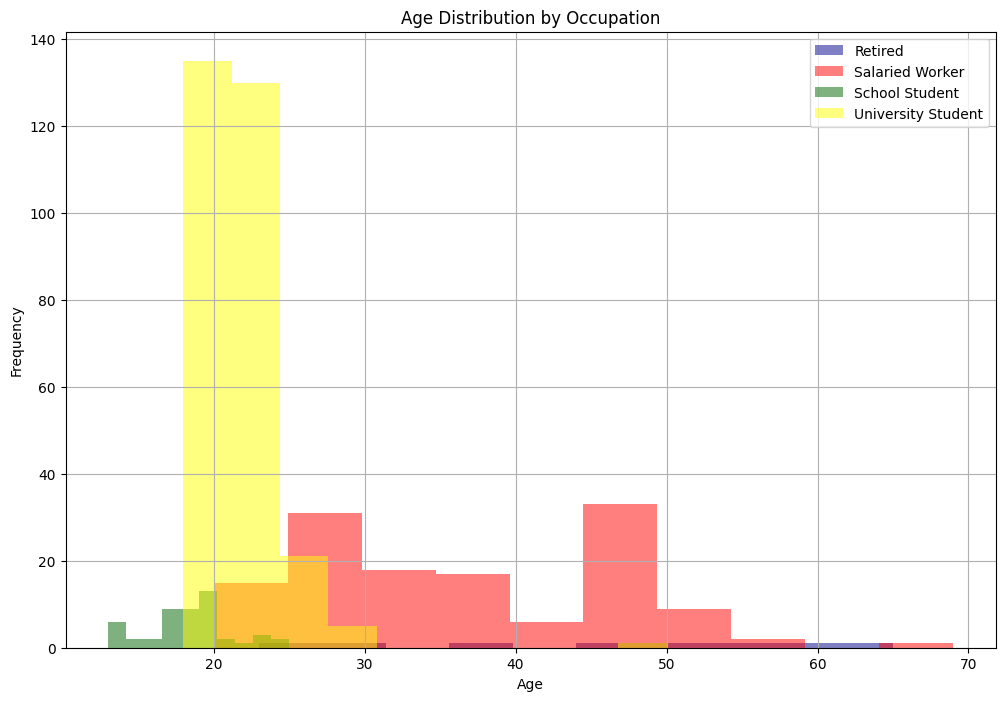

In [346]:
# Define custom colors for each occupation
colors = {
    'Retired': 'darkblue',
    'University Student': 'yellow',
    'School Student': 'darkgreen',
    'Salaried Worker': 'red',
}

# Grouping ages by occupation
grouped_ages = data.groupby('Occupation')['Age']

# Plotting histograms for each occupation with custom colors
plt.figure(figsize=(12, 8))
for occupation, ages in grouped_ages:
    plt.hist(ages, bins=10, alpha=0.5, label=occupation, color=colors.get(occupation, 'gray'))

plt.title('Age Distribution by Occupation')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [347]:
school_student_ages = data[data['Occupation'] == 'School Student']['Age']
print("Ages of School Students:")
print(school_student_ages)

Ages of School Students:
17     25
33     18
43     19
47     17
57     19
65     24
67     18
68     14
71     23
72     14
84     17
93     17
96     14
97     20
98     22
99     16
129    16
159    19
191    19
198    17
205    20
243    19
270    19
279    17
281    21
296    17
302    21
310    15
312    17
322    18
337    18
349    18
354    19
360    19
387    19
394    20
413    17
415    18
416    18
417    18
424    19
425    17
458    23
463    13
464    14
465    13
466    23
468    18
469    15
Name: Age, dtype: int64


In [348]:
school_student_rows = data[data['Occupation'] == 'School Student']

print("Rows of School Students:")
print(school_student_rows)

Rows of School Students:
     Age      Gender Relationship Status      Occupation Social Media User?  \
17    25        Male              Single  School Student                Yes   
33    18      Female              Single  School Student                Yes   
43    19      Female              Single  School Student                Yes   
47    17      Female              Single  School Student                Yes   
57    19      Female              Single  School Student                Yes   
65    24        Male   In a relationship  School Student                Yes   
67    18  Non-Binary              Single  School Student                Yes   
68    14        Male              Single  School Student                Yes   
71    23        Male              Single  School Student                Yes   
72    14      Female              Single  School Student                Yes   
84    17        Male              Single  School Student                Yes   
93    17     unsure        

A large portion of people listed as over 18 years have 'school student' listed as their occupation. That age group would be univeristy student, assuming this was user error, I will switch their occupation to university student. (in this step, it would be necessary to consult with the stakeholders or company employee responsible for the data to verify if this was a true error).

In [349]:
# Filter rows where the current occupation is 'School Student' and the age is over 18, and update the 'Occupation' column
data.loc[(data['Occupation'] == 'School Student') & (data['Age'] > 18), 'Occupation'] = 'University Student'

In [350]:
school_student_rows = data[data['Occupation'] == 'School Student']

print("Rows of School Students:")
print(school_student_rows)

Rows of School Students:
     Age      Gender Relationship Status      Occupation Social Media User?  \
33    18      Female              Single  School Student                Yes   
47    17      Female              Single  School Student                Yes   
67    18  Non-Binary              Single  School Student                Yes   
68    14        Male              Single  School Student                Yes   
72    14      Female              Single  School Student                Yes   
84    17        Male              Single  School Student                Yes   
93    17     unsure               Single  School Student                Yes   
96    14        Male              Single  School Student                Yes   
99    16        Male              Single  School Student                Yes   
129   16        Male              Single  School Student                Yes   
198   17        Male              Single  School Student                Yes   
279   17        Male       

In [351]:
school_student_rows = data[data['Occupation'] == 'Retired']

print("Rows of Retired:")
print(school_student_rows)

Rows of Retired:
     Age  Gender Relationship Status Occupation Social Media User?  \
42    56  Female             Married    Retired                Yes   
46    65    Male             Married    Retired                Yes   
74    23  Female              Single    Retired                Yes   
135   49    Male             Married    Retired                Yes   
158   37  Female             Married    Retired                Yes   
162   48  Female             Married    Retired                Yes   
428   30  Female             Married    Retired                Yes   
453   60    Male              Single    Retired                Yes   

    Hours Per Day  ADHD Score  Anxiety Score  Self Esteem Score  \
42           1.5h           4              4                  5   
46           3.5h          11              4                  8   
74           4.5h          16              7                  9   
135          4.5h          16              7                  9   
158          1.5h

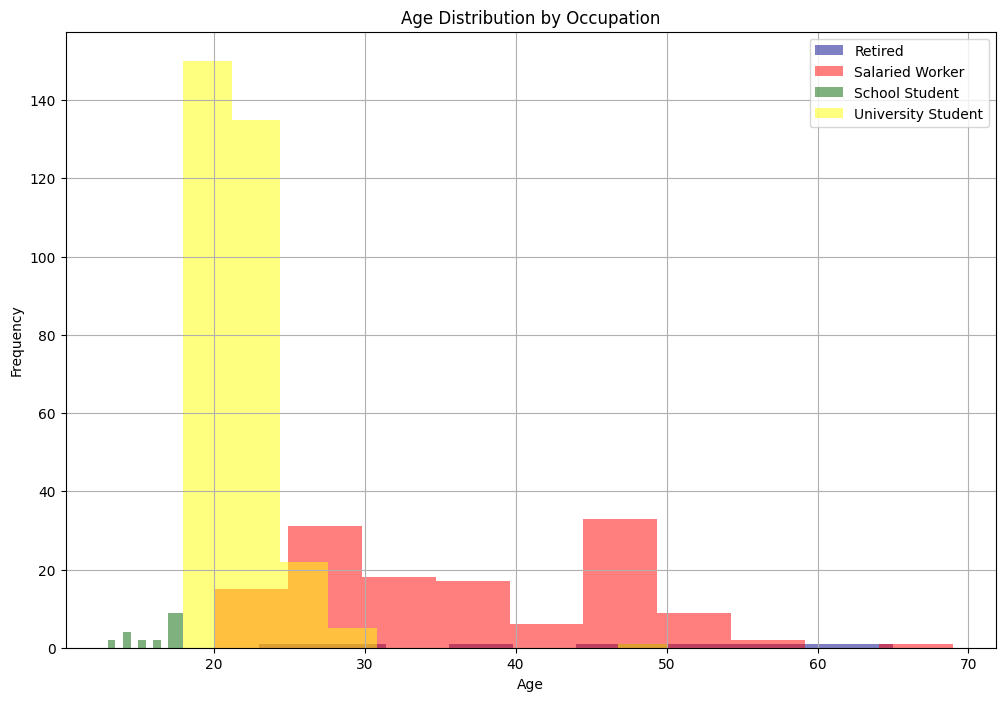

In [352]:
# Define custom colors for each occupation
colors = {
    'Retired': 'darkblue',
    'University Student': 'yellow',
    'School Student': 'darkgreen',
    'Salaried Worker': 'red',
}

# Grouping ages by occupation
grouped_ages = data.groupby('Occupation')['Age']

# Plotting histograms for each occupation with custom colors
plt.figure(figsize=(12, 8))
for occupation, ages in grouped_ages:
    plt.hist(ages, bins=10, alpha=0.5, label=occupation, color=colors.get(occupation, 'gray'))

plt.title('Age Distribution by Occupation')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

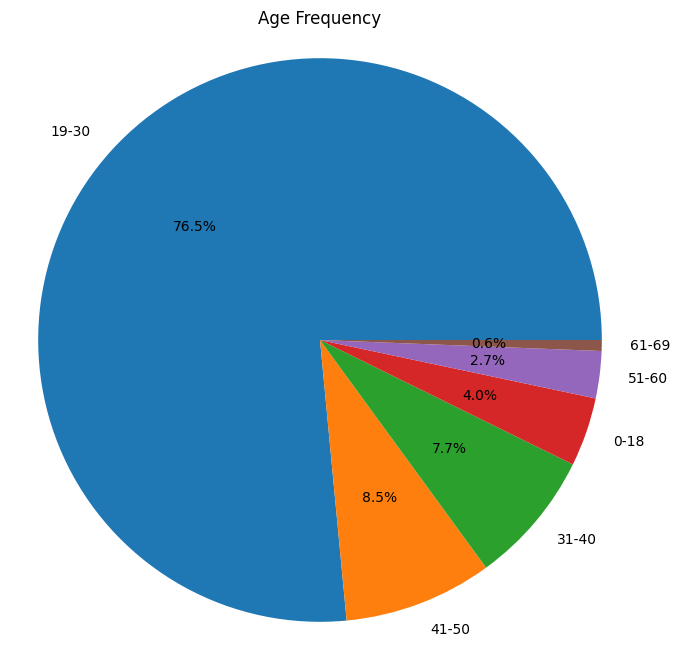

In [353]:
# Define age bins
bins = [0, 18, 30, 40, 50, 60, 70]
labels = ['0-18', '19-30', '31-40', '41-50', '51-60', '61-69']

# Assign age groups based on bins
data['Age Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

# Calculate the count of each age group
age_group_counts = data['Age Group'].value_counts()

# Plotting pie chart for age distribution
plt.figure(figsize=(8, 8))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%')

plt.title('Age Frequency')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

**Platfroms Distribution**

In [354]:
data.head(1)

,Age,Gender,Relationship Status,Occupation,Social Media User?,Hours Per Day,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score,Platforms,Age Group
0,21,Male,In a relationship,University Student,Yes,2.5h,18,4,7,14,43,"SN, MS, DF",19-30


Over 300 people use Social Networking and Media Sharing. Less than 50 use only one type of platform.  Discussion forums are not as popular as the other two catagories.

# **Gender Distribution**

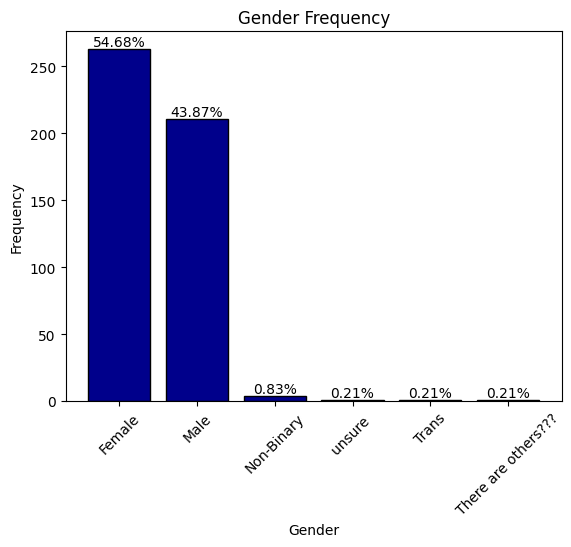

In [355]:
# Calculate frequencies of each value in 'Gender' column
frequency_table = data['Gender'].value_counts().reset_index()
frequency_table.columns = ['Gender', 'Frequency']

# Calculate percentages
total_count = len(data)
frequency_table['Percentage'] = (frequency_table['Frequency'] / total_count) * 100

# Create a bar graph with percentages on top of bars
fig, ax = plt.subplots()
bars = plt.bar(frequency_table['Gender'], frequency_table['Frequency'], width=0.8, edgecolor='k', color='darkblue')

# Add percentage labels on top of each bar
for bar, percentage in zip(bars, frequency_table['Percentage']):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.2f}%', ha='center', va='bottom')

# Add titles and labels
plt.title('Gender Frequency')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Display the graph
plt.show()

Over 50% are female, approx. 44% are male. Non-binary, unsure, trans, and there are others??? represent less than 1% of the sample, so it is impossible to make statistical inferences.

<br>
Although more and more people are opening up about their gender identities, it still seems that certain groups are underrepresnted. It would be best to gether more data about these groups so that the "new social media" platform can be inclusive and cater to all of its user needs. As well as create a healthy environment for these groups to promote psycholgical well-being.

**Occupation Frequency**

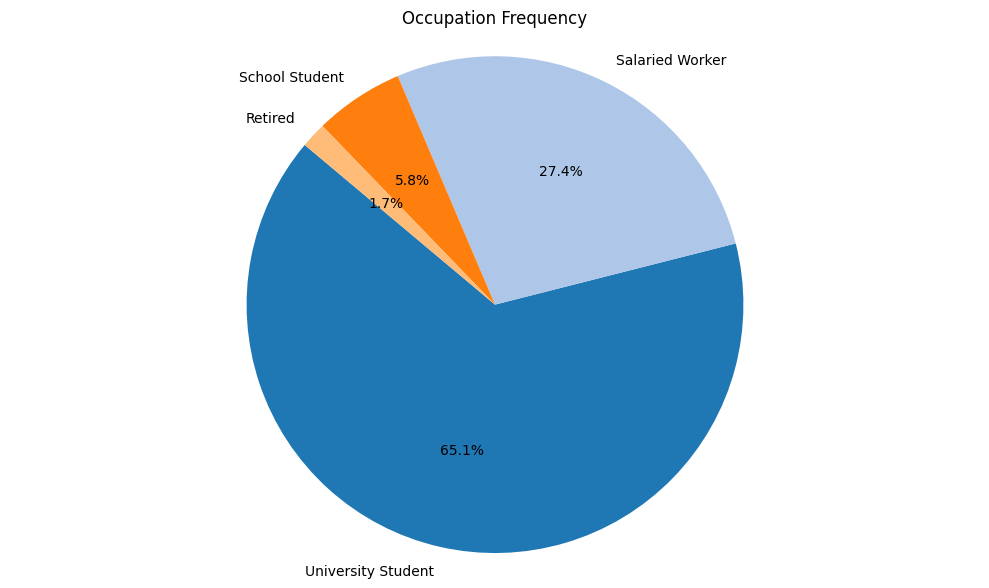

In [356]:
# Calculate frequencies of each value in 'Occupation' column
frequency_table = data['Occupation'].value_counts().reset_index()
frequency_table.columns = ['Occupation', 'Frequency']

# Create a pie chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.pie(frequency_table['Frequency'], labels=frequency_table['Occupation'], autopct='%1.1f%%', startangle=140, colors=plt.cm.tab20.colors)

# Add title
plt.title('Occupation Frequency')

# Display the graph
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

**Relationship Status Frequency**

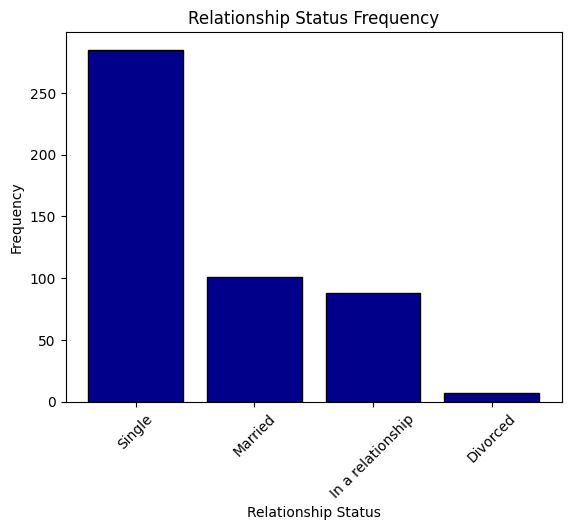

In [357]:
# Calculate frequencies of each value in 'Platforms' column
frequency_table = data['Relationship Status'].value_counts().reset_index()
frequency_table.columns = ['Relationship Status', 'Frequency']

# Create a bar graph
plt.bar(frequency_table['Relationship Status'], frequency_table['Frequency'],width=0.8, edgecolor='k', color='darkblue')
plt.xticks(frequency_table['Relationship Status'],)

# Add titles and labels
plt.title('Relationship Status Frequency')
plt.xlabel('Relationship Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Display the graph
plt.show()

In [358]:
relationship_frequency = data['Relationship Status'].value_counts()

print(relationship_frequency)

Relationship Status
Single               285
Married              101
In a relationship     88
Divorced               7
Name: count, dtype: int64


Majority single. Married and In a relationship close to equal. Very small amount divorced.

In [359]:
#install necessary package for statistical analysis
import sys
!{sys.executable} -m pip install scipy

from scipy.stats import pearsonr

# **Hours Per Day vs Total Score**

In [360]:
# Calculate mean and standard deviation for each bin
summary_stats = data.groupby('Hours Per Day')['Total Score'].agg(['mean', 'std'])

# Display summary statistics
print(summary_stats)

                    mean       std
Hours Per Day                     
0.5h           24.882353  8.322167
1.5h           31.771429  7.890871
2.5h           36.019802  8.435615
3.5h           38.397849  8.353780
4.5h           39.179104  7.438486
5.5h           41.258621  7.576991


In [361]:
print(data['Hours Per Day'].dtype)

object


In [362]:
data.head(1)

,Age,Gender,Relationship Status,Occupation,Social Media User?,Hours Per Day,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score,Platforms,Age Group
0,21,Male,In a relationship,University Student,Yes,2.5h,18,4,7,14,43,"SN, MS, DF",19-30


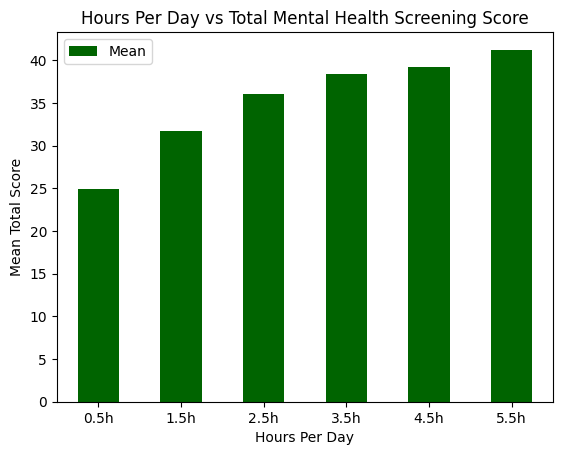

In [363]:
# Calculate mean and standard deviation for each bin
summary_stats = data.groupby('Hours Per Day')['Total Score'].agg(['mean'])

# Plot mean total score as bar plot with dark green color
mean_plot = summary_stats['mean'].plot(kind='bar', color='darkgreen', label='Mean')

# Add labels and title
plt.xlabel('Hours Per Day')
plt.ylabel('Mean Total Score')
plt.title('Hours Per Day vs Total Mental Health Screening Score')

plt.xticks(rotation=0)

# Add legend
plt.legend()

# Show plot
plt.show()

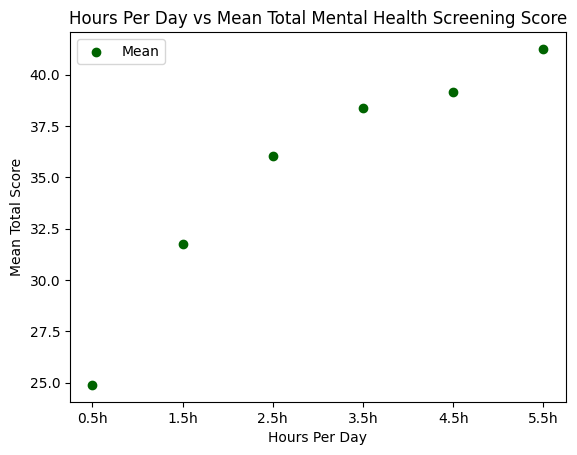

In [364]:
# Calculate mean for each bin
summary_stats = data.groupby('Hours Per Day')['Total Score'].mean().reset_index()

# Plot scatter plot
plt.scatter(summary_stats['Hours Per Day'], summary_stats['Total Score'], color='darkgreen', label='Mean')

# Add labels and title
plt.xlabel('Hours Per Day')
plt.ylabel('Mean Total Score')
plt.title('Hours Per Day vs Mean Total Mental Health Screening Score')

# Add legend
plt.legend()

# Show plot
plt.show()

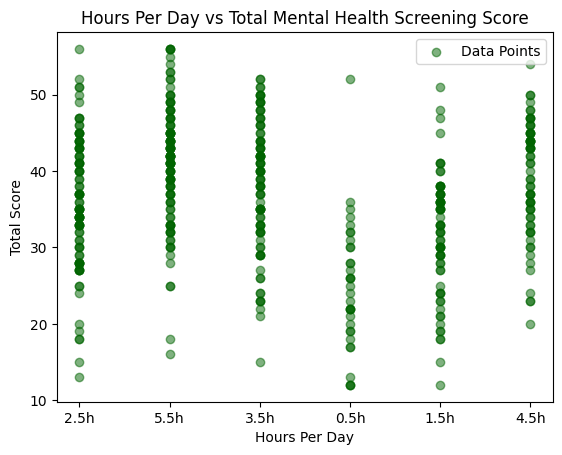

In [365]:
# Plot scatter plot
plt.scatter(data['Hours Per Day'], data['Total Score'], color='darkgreen', label='Data Points', alpha=0.5)

# Add labels and title
plt.xlabel('Hours Per Day')
plt.ylabel('Total Score')
plt.title('Hours Per Day vs Total Mental Health Screening Score')

# Add legend
plt.legend()

# Show plot
plt.show()

# **Age vs Total Score**

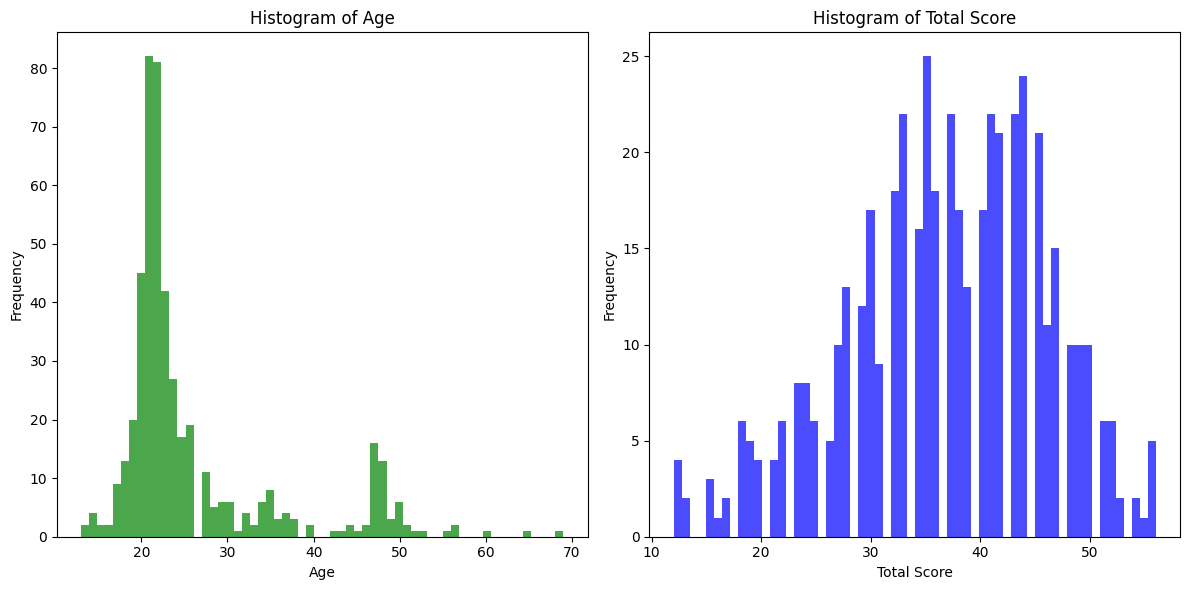

In [366]:
plt.figure(figsize=(12, 6))  # Adjust the figure size as needed

# Histogram for Age
plt.subplot(1, 2, 1)
plt.hist(data['Age'], bins=60, color='green', alpha=0.7)  # Histogram
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Histogram for Total Score
plt.subplot(1, 2, 2)
plt.hist(data['Total Score'], bins=60, color='blue', alpha=0.7)  # Histogram
plt.title('Histogram of Total Score')
plt.xlabel('Total Score')
plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [367]:
total_score_frequency = data['Total Score'].value_counts()

# Print frequency of total scores
print("Frequency of Total Scores:")
print(total_score_frequency)

Frequency of Total Scores:
Total Score
35    25
44    24
43    22
33    22
37    22
41    22
42    21
45    21
36    18
32    18
40    17
38    17
30    17
34    16
47    15
28    13
39    13
29    12
46    11
48    10
49    10
27    10
50    10
31     9
23     8
24     8
18     6
25     6
52     6
22     6
51     6
56     5
19     5
26     5
21     4
12     4
20     4
15     3
53     2
54     2
17     2
13     2
16     1
55     1
Name: count, dtype: int64


In [368]:
# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(data['Age'], data['Total Score'])[0, 1]

print(f"The correlation coefficient between Age and Total Score is: {correlation_coefficient:.2f}")

The correlation coefficient between Age and Total Score is: -0.35


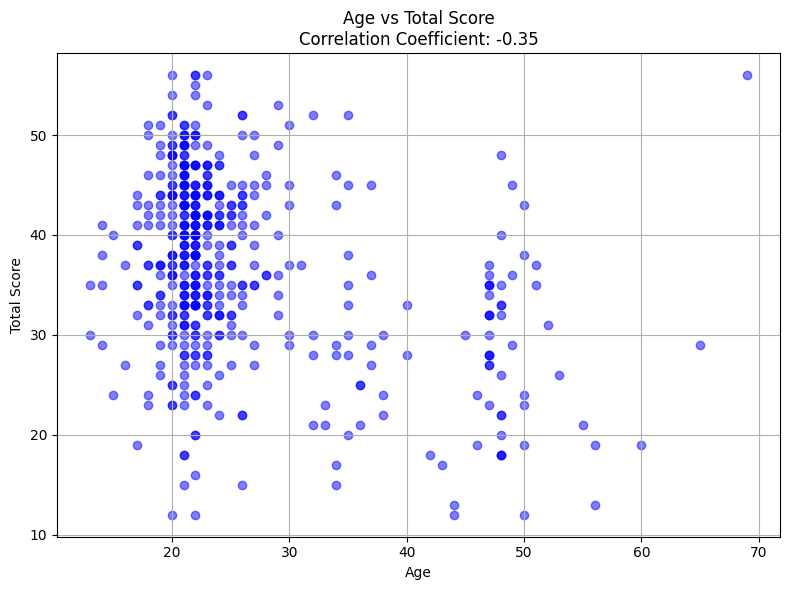

In [369]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Scatter plot
plt.scatter(data['Age'], data['Total Score'], color='blue', alpha=0.5, label='Data')  # Scatter plot

# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(data['Age'], data['Total Score'])[0, 1]

plt.title('Age vs Total Score\nCorrelation Coefficient: {:.2f}'.format(correlation_coefficient))
plt.xlabel('Age')
plt.ylabel('Total Score')

plt.grid(True)  # Add grid
plt.tight_layout()

plt.show()

There is a negative correlation. Older particiapnts have better mental health.

# **Platforms**

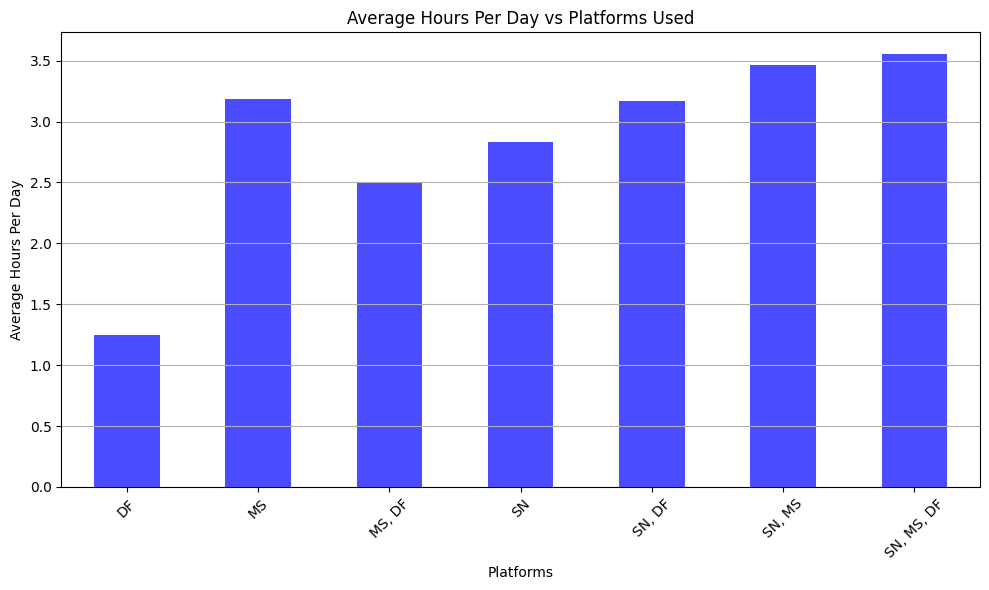

In [370]:
# Clean 'Hours Per Day' column and convert it to numeric
data['Hours Per Day'] = data['Hours Per Day'].str.replace('h', '').astype(float)

# Calculate the average hours per day for each platform
avg_hours_per_day = data.groupby('Platforms')['Hours Per Day'].mean()

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Bar plot
avg_hours_per_day.plot(kind='bar', color='blue', alpha=0.7)

plt.title('Average Hours Per Day vs Platforms Used')
plt.xlabel('Platforms')
plt.ylabel('Average Hours Per Day')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.grid(axis='y')  # Add gridlines on the y-axis
plt.tight_layout()

plt.show()


In [371]:
avg_hours_per_day = data.groupby('Platforms')['Hours Per Day'].mean()

# Print the mean hours per day for each platform
print(avg_hours_per_day)

Platforms
DF            1.250000
MS            3.184211
MS, DF        2.500000
SN            2.833333
SN, DF        3.166667
SN, MS        3.464744
SN, MS, DF    3.554545
Name: Hours Per Day, dtype: float64


Platforms
DF            1.250000
MS            3.184211
MS, DF        2.500000
SN            2.833333
SN, DF        3.166667
SN, MS        3.464744
SN, MS, DF    3.554545
Name: Hours Per Day, dtype: float64


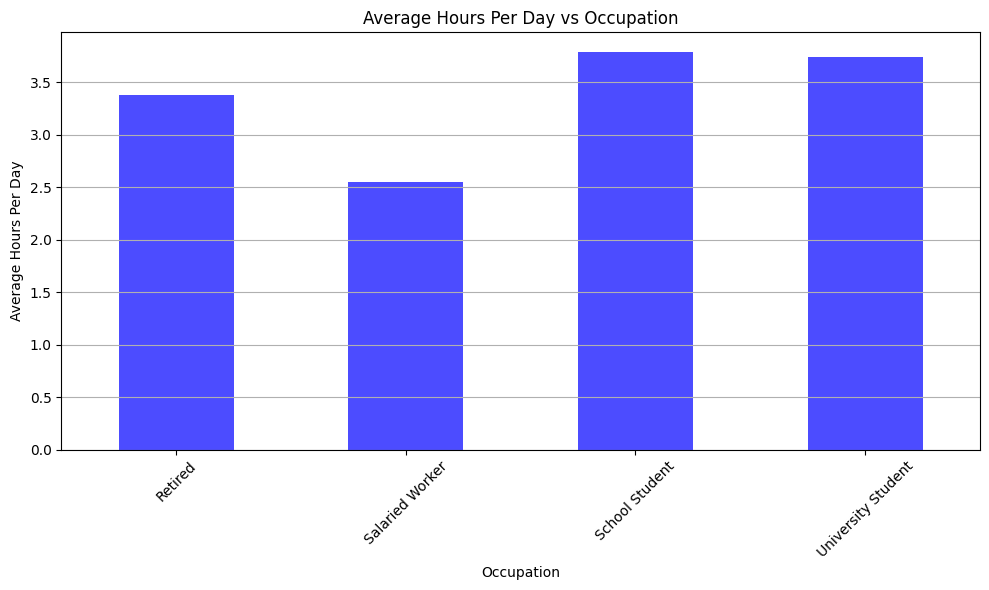

In [372]:
# Print the mean hours per day for each platform
print(avg_hours_per_day)

# Calculate the average hours per day for each occupation
avg_hours_per_day = data.groupby('Occupation')['Hours Per Day'].mean()

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Bar plot
avg_hours_per_day.plot(kind='bar', color='blue', alpha=0.7)

plt.title('Average Hours Per Day vs Occupation')
plt.xlabel('Occupation')
plt.ylabel('Average Hours Per Day')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.grid(axis='y')  # Add gridlines on the y-axis
plt.tight_layout()

plt.show()


In [373]:
data.head(1)

,Age,Gender,Relationship Status,Occupation,Social Media User?,Hours Per Day,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score,Platforms,Age Group
0,21,Male,In a relationship,University Student,Yes,2.5,18,4,7,14,43,"SN, MS, DF",19-30


In [374]:
# Define a function to map groups based on the combination of strings
def assign_group(row):
    if 'SN' in row and 'MS' in row and 'DF' in row:
        return 'SNetwork/MediaS/DiscussionF'
    elif 'SN' in row and 'DF' in row:
        return 'SNetwork/DiscussionF'
    elif 'MS' in row and 'DF' in row:
        return 'MediaS/DiscussionF'
    elif 'SN' in row and 'MS' in row:
        return 'SNetwork/MediaS'
    elif 'SN' in row:
        return 'Social Network Only'
    elif 'MS' in row:
        return 'Media Sharing Only'
    elif 'DF' in row:
        return 'Discussion Forum Only'
    else:
        return 'unknown_group'

# Apply the function to create a new column with group names
data['Platforms Used'] = data['Platforms'].apply(assign_group)

print(data.head())


   Age  Gender Relationship Status          Occupation Social Media User?  \
0   21    Male   In a relationship  University Student                Yes   
1   21  Female              Single  University Student                Yes   
2   21  Female              Single  University Student                Yes   
3   21  Female              Single  University Student                Yes   
4   21  Female              Single  University Student                Yes   

   Hours Per Day  ADHD Score  Anxiety Score  Self Esteem Score  \
0            2.5          18              4                  7   
1            5.5          15              7                  7   
2            3.5          11              6                  7   
3            5.5          12              6                  8   
4            2.5          17              9                  9   

   Depression Score  Total Score   Platforms Age Group  \
0                14           43  SN, MS, DF     19-30   
1                14     

In [375]:
# Calculate mean and standard deviation for each bin
summary_stats = data.groupby('Platforms Used')['Total Score'].agg(['mean'])

# Display summary statistics
print(summary_stats)

                                  mean
Platforms Used                        
Discussion Forum Only        30.000000
Media Sharing Only           33.315789
MediaS/DiscussionF           28.333333
SNetwork/DiscussionF         34.166667
SNetwork/MediaS              37.182692
SNetwork/MediaS/DiscussionF  37.300000
Social Network Only          35.750000


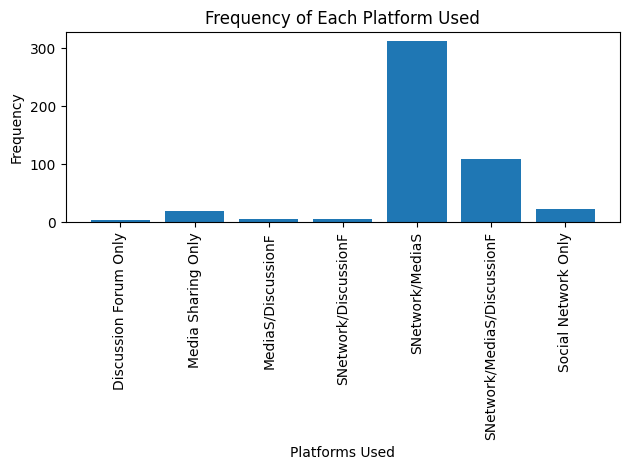

In [376]:
# Assuming 'platforms_used' is the column containing platform names
group_counts = data['Platforms Used'].value_counts()

# Sort the index for proper alignment
group_counts = group_counts.sort_index()

# Plotting the bar graph
plt.bar(group_counts.index, group_counts.values)

# Adding labels and title
plt.xlabel('Platforms Used')
plt.ylabel('Frequency')
plt.title('Frequency of Each Platform Used')

# Display the plot
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [377]:
platforms_frequency = data['Platforms Used'].value_counts()

print(platforms_frequency)

Platforms Used
SNetwork/MediaS                312
SNetwork/MediaS/DiscussionF    110
Social Network Only             24
Media Sharing Only              19
MediaS/DiscussionF               6
SNetwork/DiscussionF             6
Discussion Forum Only            4
Name: count, dtype: int64


In [378]:
# Calculate mean and standard deviation for each bin
summary_stats = data.groupby('Platforms')['Total Score'].agg(['mean'])

# Display summary statistics
print(summary_stats)

                 mean
Platforms            
DF          30.000000
MS          33.315789
MS, DF      28.333333
SN          35.750000
SN, DF      34.166667
SN, MS      37.182692
SN, MS, DF  37.300000


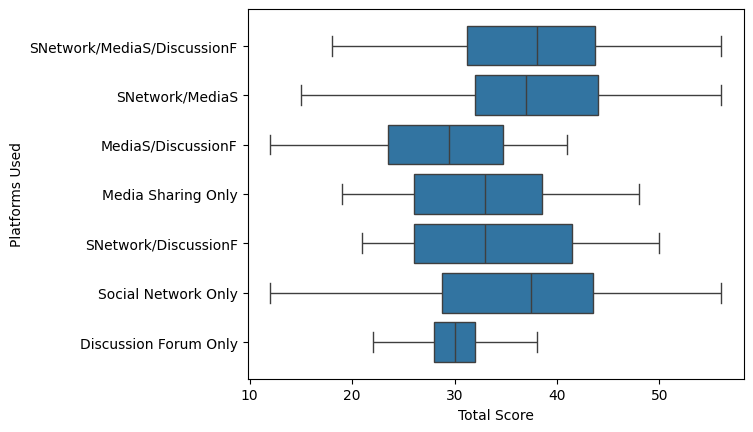

In [379]:
# Calculate the median total score for each platform
median_scores = data.groupby('Platforms Used')['Total Score'].median().reset_index()

# Plot the boxplot without outliers
sns.boxplot(y='Platforms Used', x='Total Score', data=data, showfliers=False)

# Plot only the median score points
plt.scatter(y=median_scores['Platforms Used'], x=median_scores['Total Score'], color='red', marker='o', label='Median Score')
plt.show()

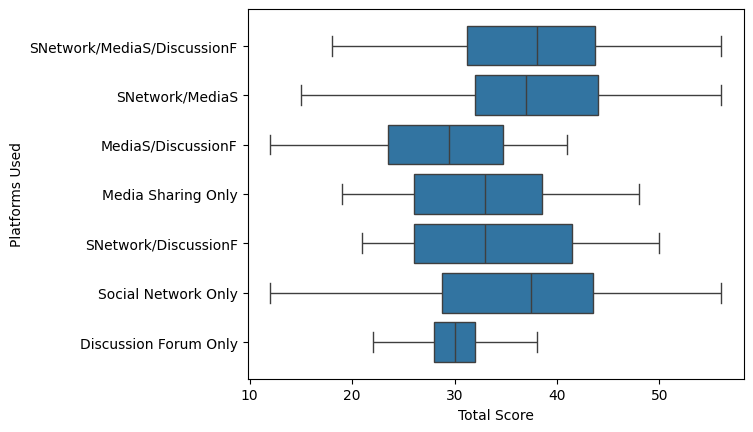

In [380]:
# Calculate the median total score for each platform
mean_scores = data.groupby('Platforms Used')['Total Score'].mean().reset_index()

# Plot the boxplot without outliers
sns.boxplot(y='Platforms Used', x='Total Score', data=data, showfliers=False)

# Plot only the median score points
plt.scatter(y=mean_scores['Platforms Used'], x=mean_scores['Total Score'], color='red', marker='o', label='Mean Score')
plt.show()

# **Occupation Vs. Mental Health Screening Score**

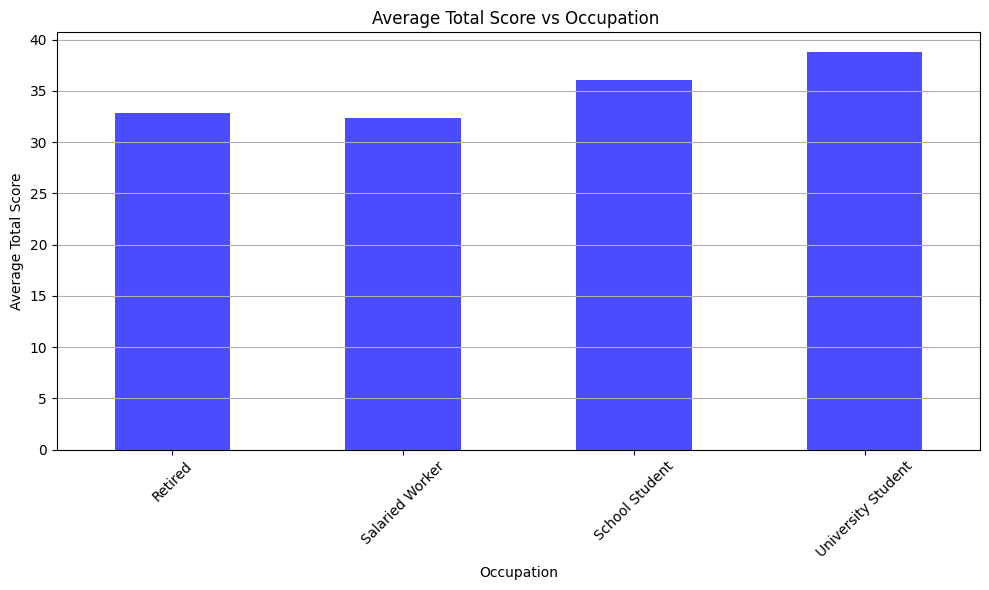

In [381]:
# Calculate the average hours per day for each platform
avg_hours_per_day = data.groupby('Occupation')['Total Score'].mean()

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Bar plot
avg_hours_per_day.plot(kind='bar', color='blue', alpha=0.7)

plt.title('Average Total Score vs Occupation ')
plt.xlabel('Occupation')
plt.ylabel('Average Total Score')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.grid(axis='y')  # Add gridlines on the y-axis
plt.tight_layout()

plt.show()

What is the relatiosnhip between purpose of social media use and mental health score? ADHD Questions focus on how purposeles or distracting social media use it

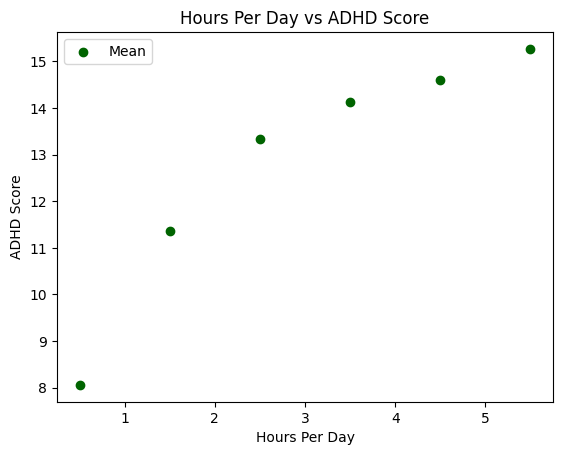

In [382]:
# Calculate mean for each bin
summary_stats = data.groupby('Hours Per Day')['ADHD Score'].mean().reset_index()

# Plot scatter plot
plt.scatter(summary_stats['Hours Per Day'], summary_stats['ADHD Score'], color='darkgreen', label='Mean')

# Add labels and title
plt.xlabel('Hours Per Day')  # Label for x-axis
plt.ylabel('ADHD Score')  # Label for y-axis
plt.title('Hours Per Day vs ADHD Score')  # Title of the plot

# Add legend
plt.legend()

# Show plot
plt.show()

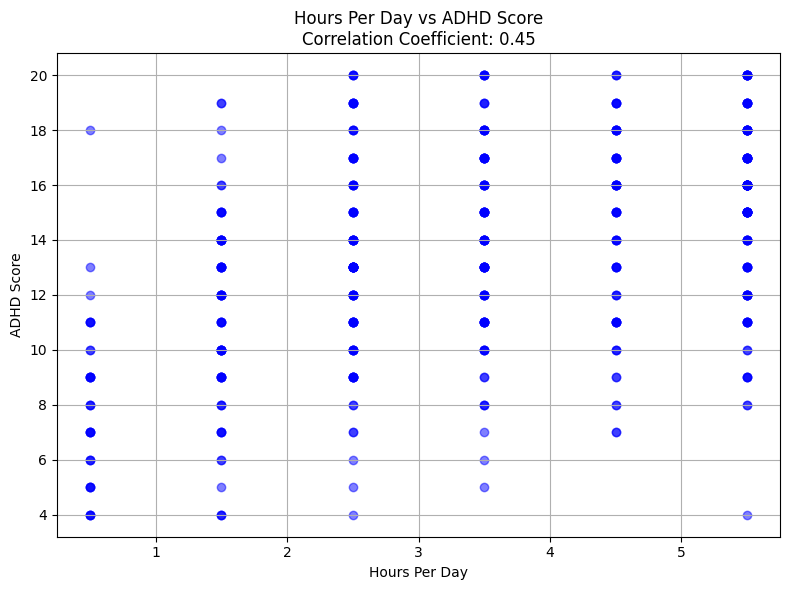

In [383]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Scatter plot
plt.scatter(data['Hours Per Day'], data['ADHD Score'], color='blue', alpha=0.5, label='Data')  # Scatter plot

# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(data['Hours Per Day'], data['ADHD Score'])[0, 1]

plt.title('Hours Per Day vs ADHD Score\nCorrelation Coefficient: {:.2f}'.format(correlation_coefficient))
plt.xlabel('Hours Per Day')
plt.ylabel('ADHD Score')

plt.grid(True)  # Add grid
plt.tight_layout()

plt.show()

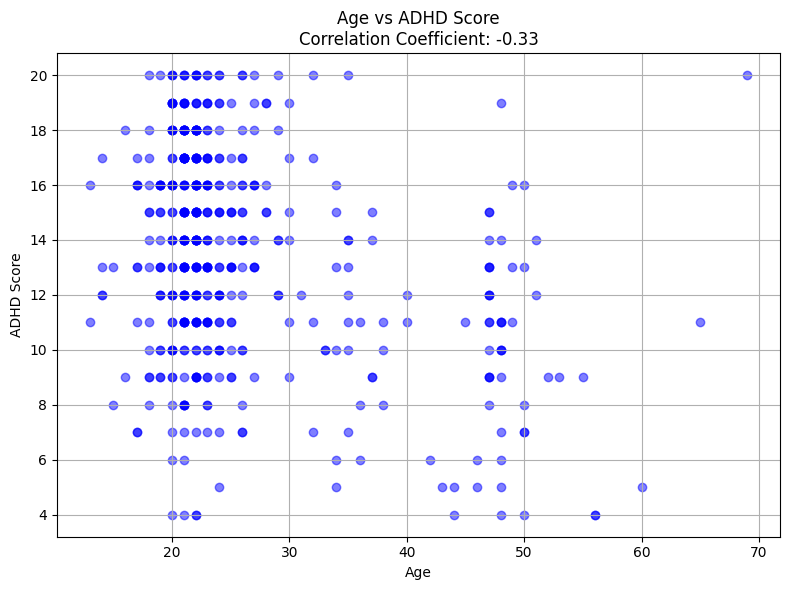

In [384]:
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed

# Scatter plot
plt.scatter(data['Age'], data['ADHD Score'], color='blue', alpha=0.5, label='Data')  # Scatter plot

# Calculate correlation coefficient
correlation_coefficient = np.corrcoef(data['Age'], data['ADHD Score'])[0, 1]

plt.title('Age vs ADHD Score\nCorrelation Coefficient: {:.2f}'.format(correlation_coefficient))
plt.xlabel('Age')
plt.ylabel('ADHD Score')

plt.grid(True)  # Add grid
plt.tight_layout()

plt.show()

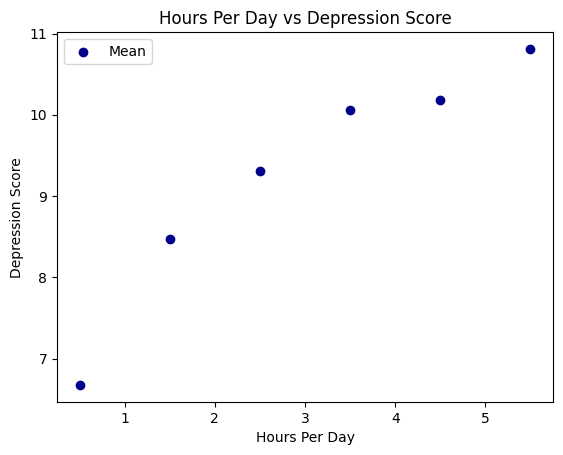

In [385]:
# Calculate mean for each bin
summary_stats = data.groupby('Hours Per Day')['Depression Score'].mean().reset_index()

# Plot scatter plot
plt.scatter(summary_stats['Hours Per Day'], summary_stats['Depression Score'], color='darkblue', label='Mean')

# Add labels and title
plt.xlabel('Hours Per Day')  # Label for x-axis
plt.ylabel('Depression Score')  # Label for y-axis
plt.title('Hours Per Day vs Depression Score')  # Title of the plot

# Add legend
plt.legend()

# Show plot
plt.show()

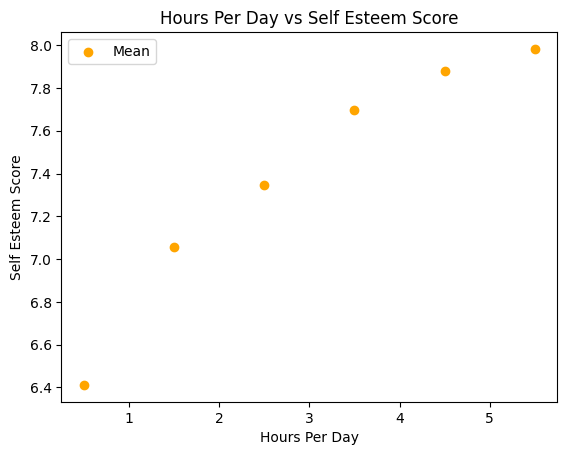

In [386]:
# Calculate mean for each bin
summary_stats = data.groupby('Hours Per Day')['Self Esteem Score'].mean().reset_index()

# Plot scatter plot
plt.scatter(summary_stats['Hours Per Day'], summary_stats['Self Esteem Score'], color='orange', label='Mean')

# Add labels and title
plt.xlabel('Hours Per Day')  # Label for x-axis
plt.ylabel('Self Esteem Score')  # Label for y-axis
plt.title('Hours Per Day vs Self Esteem Score')  # Title of the plot

# Add legend
plt.legend()

# Show plot
plt.show()

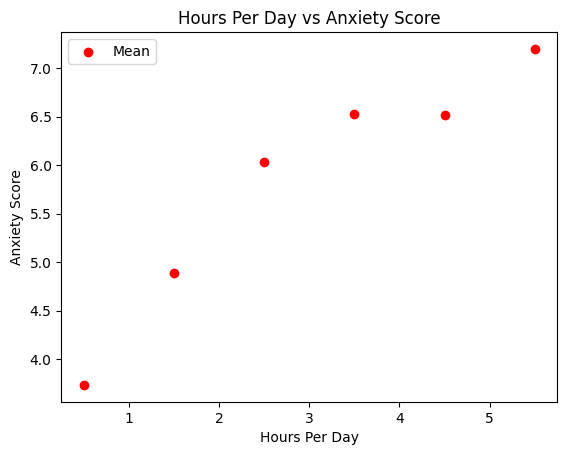

In [387]:
# Calculate mean for each bin
summary_stats = data.groupby('Hours Per Day')['Anxiety Score'].mean().reset_index()

# Plot scatter plot
plt.scatter(summary_stats['Hours Per Day'], summary_stats['Anxiety Score'], color='red', label='Mean')

# Add labels and title
plt.xlabel('Hours Per Day')  # Label for x-axis
plt.ylabel('Anxiety Score')  # Label for y-axis
plt.title('Hours Per Day vs Anxiety Score')  # Title of the plot

# Add legend
plt.legend()

# Show plot
plt.show()

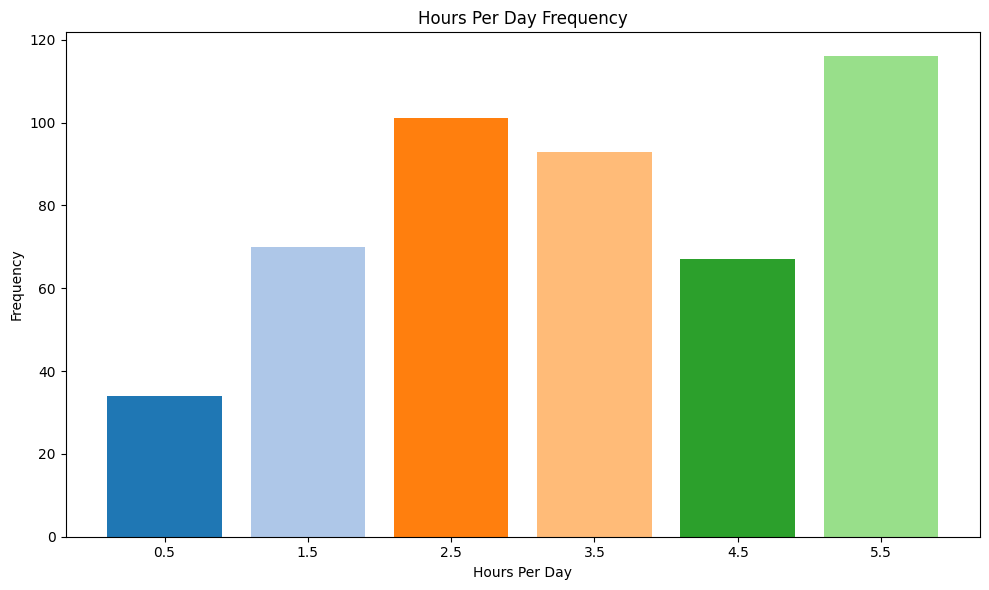

In [388]:
# Calculate frequencies of each value in 'Hours Per Day' column
frequency_table = data['Hours Per Day'].value_counts().reset_index()
frequency_table.columns = ['Hours Per Day', 'Frequency']

# Sort frequency_table by 'Hours Per Day' column
frequency_table = frequency_table.sort_values(by='Hours Per Day')

# Create a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.bar(frequency_table['Hours Per Day'], frequency_table['Frequency'], color=plt.cm.tab20.colors)

# Add title and labels
plt.title('Hours Per Day Frequency')
plt.xlabel('Hours Per Day')
plt.ylabel('Frequency')

# Display the graph
plt.xticks(frequency_table['Hours Per Day'])
plt.tight_layout()
plt.show()

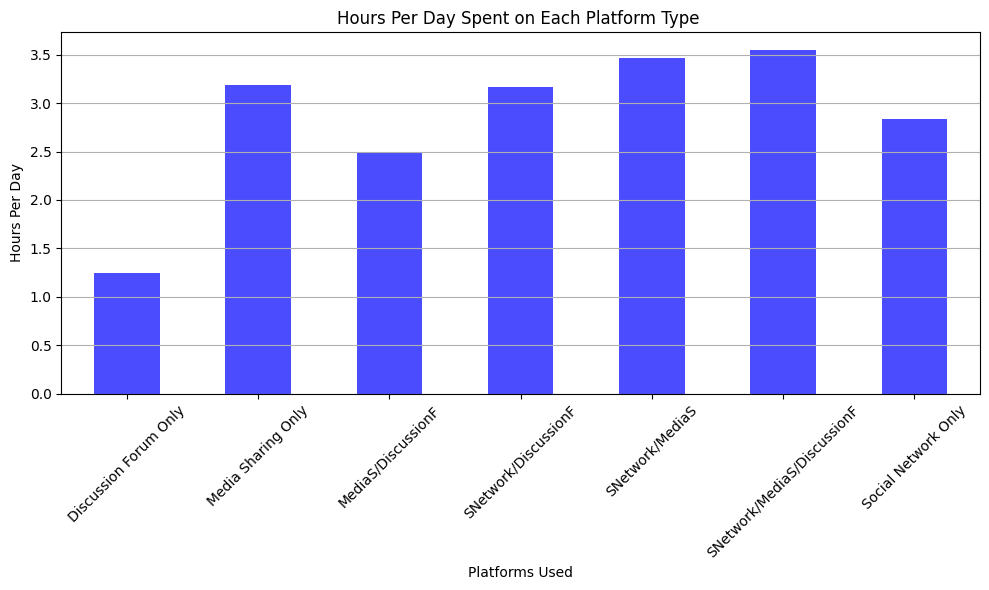

In [389]:
# Calculate the average hours per day for each platform
avg_hours_per_day = data.groupby('Platforms Used')['Hours Per Day'].mean()

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Bar plot
avg_hours_per_day.plot(kind='bar', color='blue', alpha=0.7)

plt.title('Hours Per Day Spent on Each Platform Type ')
plt.xlabel('Platforms Used')
plt.ylabel('Hours Per Day')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.grid(axis='y')  # Add gridlines on the y-axis
plt.tight_layout()

plt.show()

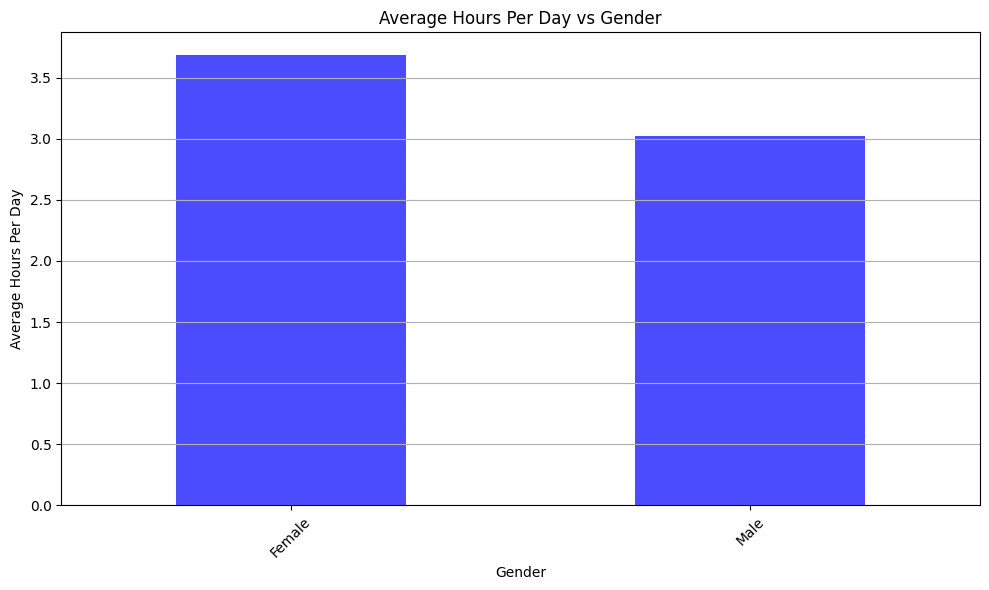

In [390]:
selected_categories = ['Male', 'Female']  # Specify the categories you want to include

# Filter the DataFrame to include only the selected categories
filtered_data = data[data['Gender'].isin(selected_categories)]

# Calculate the average hours per day for each platform
avg_hours_per_day = filtered_data.groupby('Gender')['Hours Per Day'].mean()

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Bar plot
avg_hours_per_day.plot(kind='bar', color='blue', alpha=0.7)

plt.title('Average Hours Per Day vs Gender')
plt.xlabel('Gender')
plt.ylabel('Average Hours Per Day')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.grid(axis='y')  # Add gridlines on the y-axis
plt.tight_layout()

plt.show()

Non-binary, There are others?, Trans, and Unsure have less than 1% of participants. Will only consider Female and Male for now.

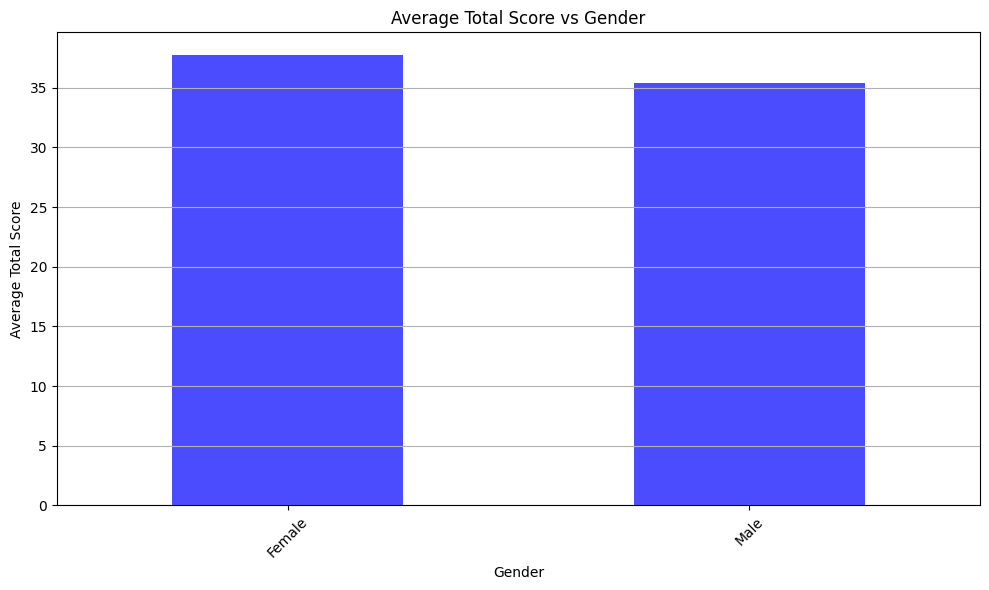

In [391]:
selected_categories = ['Male', 'Female']  # Specify the categories you want to include

# Filter the DataFrame to include only the selected categories
filtered_data = data[data['Gender'].isin(selected_categories)]

# Calculate the average hours per day for each platform
avg_hours_per_day = filtered_data.groupby('Gender')['Total Score'].mean()

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Bar plot
avg_hours_per_day.plot(kind='bar', color='blue', alpha=0.7)

plt.title('Average Total Score vs Gender')
plt.xlabel('Gender')
plt.ylabel('Average Total Score')

plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.grid(axis='y')  # Add gridlines on the y-axis
plt.tight_layout()

plt.show()

<Figure size 1000x600 with 0 Axes>

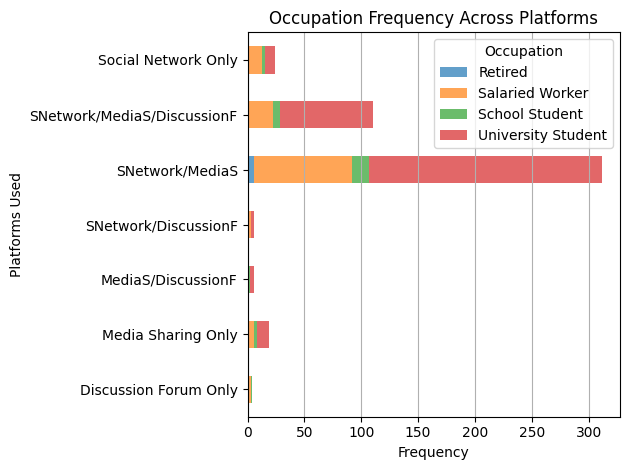

In [392]:
# Calculate the frequency of each occupation for each platform
frequency = data.groupby(['Platforms Used', 'Occupation']).size().unstack()

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

# Horizontal bar plot
frequency.plot(kind='barh', stacked=True, alpha=0.7)

plt.title('Occupation Frequency Across Platforms')
plt.xlabel('Frequency')
plt.ylabel('Platforms Used')

plt.grid(axis='x')  # Add gridlines on the x-axis
plt.tight_layout()

plt.show()


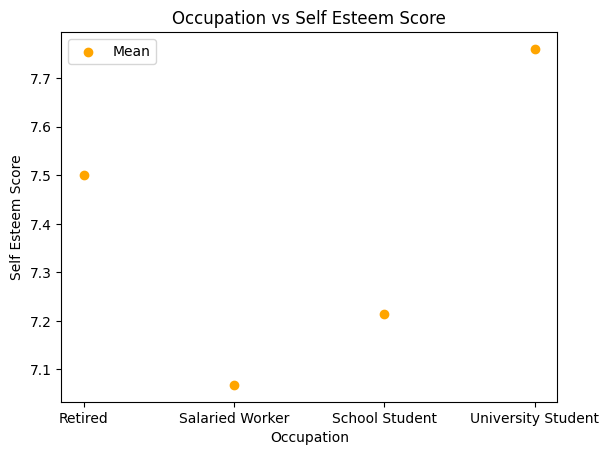

In [393]:
# Calculate mean for each bin
summary_stats = data.groupby('Occupation')['Self Esteem Score'].mean().reset_index()

# Plot scatter plot
plt.scatter(summary_stats['Occupation'], summary_stats['Self Esteem Score'], color='orange', label='Mean')

# Add labels and title
plt.xlabel('Occupation')  # Label for x-axis
plt.ylabel('Self Esteem Score')  # Label for y-axis
plt.title('Occupation vs Self Esteem Score')  # Title of the plot

# Add legend
plt.legend()

# Show plot
plt.show()

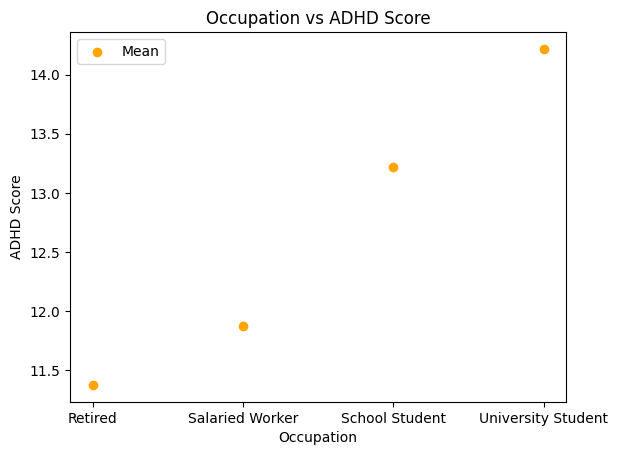

In [394]:
# Calculate mean for each bin
summary_stats = data.groupby('Occupation')['ADHD Score'].mean().reset_index()

# Plot scatter plot
plt.scatter(summary_stats['Occupation'], summary_stats['ADHD Score'], color='orange', label='Mean')

# Add labels and title
plt.xlabel('Occupation')  # Label for x-axis
plt.ylabel('ADHD Score')  # Label for y-axis
plt.title('Occupation vs ADHD Score')  # Title of the plot

# Add legend
plt.legend()

# Show plot
plt.show()

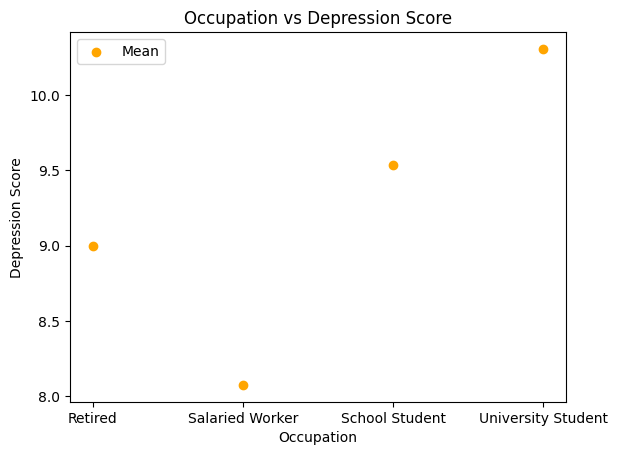

In [395]:
# Calculate mean for each bin
summary_stats = data.groupby('Occupation')['Depression Score'].mean().reset_index()

# Plot scatter plot
plt.scatter(summary_stats['Occupation'], summary_stats['Depression Score'], color='orange', label='Mean')

# Add labels and title
plt.xlabel('Occupation')  # Label for x-axis
plt.ylabel('Depression Score')  # Label for y-axis
plt.title('Occupation vs Depression Score')  # Title of the plot

# Add legend
plt.legend()

# Show plot
plt.show()

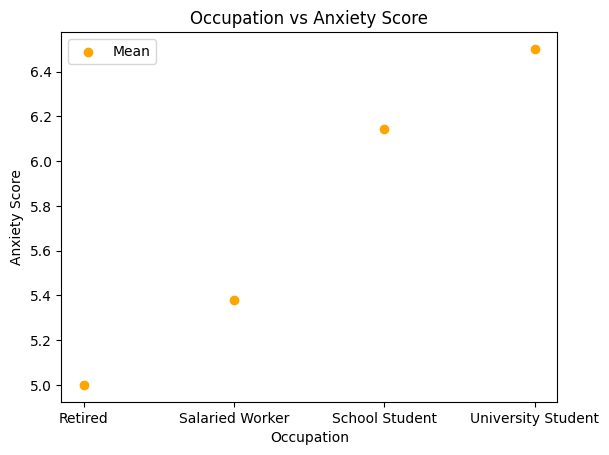

In [396]:
# Calculate mean for each bin
summary_stats = data.groupby('Occupation')['Anxiety Score'].mean().reset_index()

# Plot scatter plot
plt.scatter(summary_stats['Occupation'], summary_stats['Anxiety Score'], color='orange', label='Mean')

# Add labels and title
plt.xlabel('Occupation')  # Label for x-axis
plt.ylabel('Anxiety Score')  # Label for y-axis
plt.title('Occupation vs Anxiety Score')  # Title of the plot

# Add legend
plt.legend()

# Show plot
plt.show()

In [397]:
data.to_csv('project1.csv',index=False)

In [398]:
data.head()

,Age,Gender,Relationship Status,Occupation,Social Media User?,Hours Per Day,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score,Platforms,Age Group,Platforms Used
0,21,Male,In a relationship,University Student,Yes,2.5,18,4,7,14,43,"SN, MS, DF",19-30,SNetwork/MediaS/DiscussionF
1,21,Female,Single,University Student,Yes,5.5,15,7,7,14,43,"SN, MS, DF",19-30,SNetwork/MediaS/DiscussionF
2,21,Female,Single,University Student,Yes,3.5,11,6,7,11,35,"SN, MS",19-30,SNetwork/MediaS
3,21,Female,Single,University Student,Yes,5.5,12,6,8,9,35,"SN, MS",19-30,SNetwork/MediaS
4,21,Female,Single,University Student,Yes,2.5,17,9,9,9,44,"SN, MS",19-30,SNetwork/MediaS


In [399]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pickle
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [400]:
data.head()

,Age,Gender,Relationship Status,Occupation,Social Media User?,Hours Per Day,ADHD Score,Anxiety Score,Self Esteem Score,Depression Score,Total Score,Platforms,Age Group,Platforms Used
0,21,Male,In a relationship,University Student,Yes,2.5,18,4,7,14,43,"SN, MS, DF",19-30,SNetwork/MediaS/DiscussionF
1,21,Female,Single,University Student,Yes,5.5,15,7,7,14,43,"SN, MS, DF",19-30,SNetwork/MediaS/DiscussionF
2,21,Female,Single,University Student,Yes,3.5,11,6,7,11,35,"SN, MS",19-30,SNetwork/MediaS
3,21,Female,Single,University Student,Yes,5.5,12,6,8,9,35,"SN, MS",19-30,SNetwork/MediaS
4,21,Female,Single,University Student,Yes,2.5,17,9,9,9,44,"SN, MS",19-30,SNetwork/MediaS


In [401]:
le = LabelEncoder()  # Use LabelEncoder for most categorical columns
data['Gender'] = le.fit_transform(data['Gender'])




In [406]:
data = {'Relationship Status': ['Married', 'Single', 'In a relationship', 'Married']}

# Create DataFrame
df = pd.DataFrame(data)

# Function to convert relationship statuses to numeric values
def convert_relationship(relationship):
  if relationship == 'Single':
    return 0.0
  elif relationship == 'Married':
    return 1.0
  elif relationship == 'In a relationship':
    return 2.0  
  else:
    # Handle other cases as needed (e.g., raise error)
    return None

# Apply conversion 
df['Relationship Status'] = df['Relationship Status'].apply(convert_relationship)

# Print modified DataFrame
print(df)



   Relationship Status
0                  1.0
1                  0.0
2                  2.0
3                  1.0


In [409]:
data = pd.DataFrame(data) 
X = data
y = data['Total Score'] 


KeyError: 'Total Score'

In [404]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [405]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


ValueError: could not convert string to float: 'In a relationship'

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(),
    "Random Forest": RandomForestClassifier()
}

best_accuracy = 0
best_model = None

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"{name} Accuracy: {accuracy}")

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model


In [ ]:
if best_model:
    with open('best_model.pkl', 'wb') as f:
        pickle.dump(best_model, f)
        print('Best model saved as best_model.pkl')
